In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt2
from scipy.stats import norm
import matplotlib.pyplot as plt
import sys
try:
    import zopfli
except:
    !pip install zopfli
from zopfli.zlib import compress

In [2]:

def getCompressionsFromSongsDataframe(df):
    compressions = []
    songs = []

    for song in list(df.songLyrics):
        listOfWords = re.split(r'[;,\s...\n()\'!?.]\s*',song) # gets me a list of words
        processedSong = ''

        for word in listOfWords:
            word = word.lower()
            if word == 'x2':
                continue
            if word == 'x4':
                continue
            processedSong+=word

        compressions.append(getCompressionFromSong(processedSong))
    return compressions


In [3]:
df = pd.read_csv("songs7k.csv")
df.head()
df2 = df

### Compression plotting

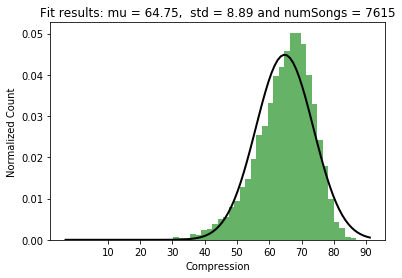

In [4]:

compressions = list(df.compressions)
# Generate some data for this demonstration.
# data = norm.rvs(100.0, 25, size=500)
data= list(df.compressions)
for x in range(len(data)):
    if(data[x]<=0):
        data[x] = -1*data[x]
# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=50, density=True, alpha=0.6, color='g')

# Plot the PDF.
plt.xticks([x for x in range(10, 100, 10)])

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel("Compression")
plt.ylabel("Normalized Count")
title = "Fit results: mu = %.2f,  std = %.2f and numSongs = %0.0f" % (mu, std, len(compressions))
plt.title(title)
plt.show()

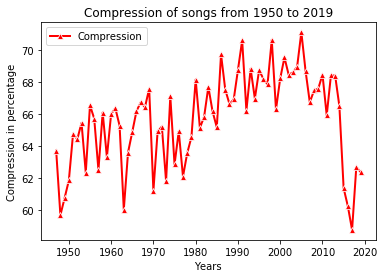

In [5]:
averageCompressionYearWiseData = []
compressionList = []
styleAnalysis = []

def songPreprocessing(song):
    processedSong = ""
    try:
        listOfWords = re.split(r'[;,\s...\n()\'!?.]\s*',song)
        processedSong = ''
        for word in listOfWords:
            word = word.lower()
            if word == 'x2':
                continue
            if word == 'x4':
                continue
            processedSong+=word
    except:
        processedSong = ""
    return processedSong

def getCompressionFromSong(song):
    compress_size = sys.getsizeof(compress(song))
    uncomressed_song_size = sys.getsizeof(song.encode())
    compression = (100-(compress_size/uncomressed_song_size)*100)
    return compression

for x in df2.years.unique():
    # get all songs with year == x
    yearCompressions = list(df2[df2.years == x].compressions)
    sumCompressions = int(0)
    countSongsInYear = len(yearCompressions)
    songIndex = 0
    songNames = list(df2[df2.years == x].songName)
    for _compression in yearCompressions:
        compression = _compression
        sumCompressions += compression
        compressionList.append([x,songNames[songIndex], compression])
        songIndex+=1
    averageCompression = sumCompressions/countSongsInYear
    averageCompressionYearWiseData.append([int(x),averageCompression])
    
yearly_compression = np.array(averageCompressionYearWiseData)  
yearly_compression_filtered = []
for x in yearly_compression:
    if(x[0]!=0):
        yearly_compression_filtered.append([x])
yearly_compression_filtered = np.array(yearly_compression_filtered)
sns.lineplot(yearly_compression_filtered[:,0][:,0], yearly_compression_filtered[:,0][:,1], color = "red" ,marker = "^", label = "Compression", linewidth = 2)
plt2.xlabel("Years")
plt2.ylabel("Compression in percentage")
plt2.title("Compression of songs from 1950 to 2019")
# plt.xticks()
plt2.show()

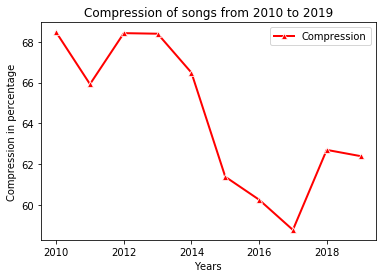

In [6]:
yearWiseCompressionDataFrame =pd.DataFrame()
yearWiseCompressionDataFrame["year"] = yearly_compression[:10][:,0]
yearWiseCompressionDataFrame["compression"] = yearly_compression[:10][:,1]
sns.lineplot(yearly_compression_filtered[:10,0][:,0], yearly_compression_filtered[:10,0][:,1], color = "red" ,marker = "^", label = "Compression", linewidth = 2)
plt2.xlabel("Years")
plt2.ylabel("Compression in percentage")
plt2.title("Compression of songs from 2010 to 2019")
# plt.xticks()
plt2.show()

In [7]:
yearWiseCompressionDataFrame

,year,compression
0,2019.0,62.388075
1,2018.0,62.694148
2,2017.0,58.761145
3,2016.0,60.246877
4,2015.0,61.374389
5,2014.0,66.489060
6,2013.0,68.402952
7,2012.0,68.431294
8,2011.0,65.923700
9,2010.0,68.475417


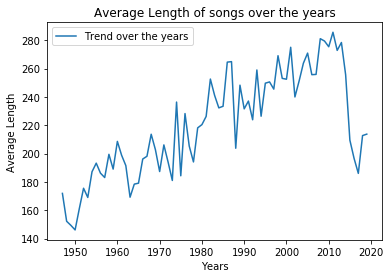

In [18]:
data = pd.read_csv("songs7k.csv")

def songPreprocessing(song):
    listOfWords = re.split(r'[;,\s...\n()\'!?.]\s*',song)
    processedSong = ''
    for word in listOfWords:
        word = word.lower()
        if word == 'x2':
            continue
        if word == 'x4':
            continue
        processedSong+=' '+ word
    return processedSong

lyrics = list(data.songLyrics)
# once we have the songs, lets preprocess the song
preprocessedSongs = []
wordCountVector = []
for song in lyrics:
    processedSong = songPreprocessing(song)
    wordCount = 0
    for word in processedSong.split(" "):
        if(word!='' and word!= ' '):
            wordCount+=1
    wordCountVector.append(wordCount)
    preprocessedSongs.append(processedSong)

# len(wordCountVector), len(preprocessedSongs), preprocessedSongs[1], wordCountVector[1]

data["wordCount"] = wordCountVector
data["preprocessedSong"] = preprocessedSongs

years = {}

allYears = list(data.years)
for year in allYears:
    years[year] = 0
    
myYears = list(data.years)
myWordCount = list(data.wordCount)

yearCountDictionary = {}
songs_in_that_year = {}
for year, wordCount in zip(myYears,myWordCount):
    if(yearCountDictionary.get(year) == None):
        yearCountDictionary[year] = 0
        
    if(songs_in_that_year.get(year) == None):
        songs_in_that_year[year] = 0
    songs_in_that_year[year]+=1
    yearCountDictionary[year] +=wordCount
    
# print(yearCountDictionary, songs_in_that_year)

average_song_length_per_year = {}
for year in years.keys():
    if(year==0):
        continue
    
    average_song_length_per_year[year] = yearCountDictionary[year]/songs_in_that_year[year]
    
        
# print(average_song_length_per_year)


keys = list(average_song_length_per_year.keys())
values =list( average_song_length_per_year.values())

df = pd.DataFrame.from_dict({'Year':keys, 'AverageLength':values})
df


plot_year_values = []
for x,y in zip(keys,values):
    plot_year_values.append([x,y])
    
def column(matrix, i):
    return [row[i] for row in matrix]

sns.lineplot(column(plot_year_values,0) , column(plot_year_values,1), label ="Trend over the years")
plt2.title("Average Length of songs over the years")
plt2.xlabel("Years")
plt2.ylabel("Average Length")
plt2.show()


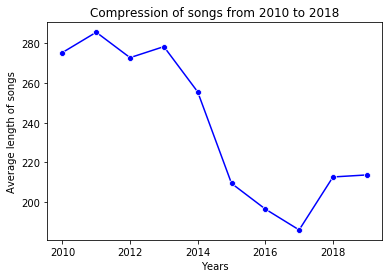

In [19]:
plot_year_values_2010_plus = []
for x,y in zip(keys,values):
    if(x>=2010):
        plot_year_values_2010_plus.append([x,y])
    
import seaborn as sns
def column(matrix, i):
    return [row[i] for row in matrix]

sns.lineplot(column(plot_year_values_2010_plus,0) , column(plot_year_values_2010_plus,1), marker = "o", color = "blue")
plt2.xlabel("Years")
plt2.ylabel("Average length of songs")
plt2.title("Compression of songs from 2010 to 2018")
# plt.xticks()
plt2.show()

In [16]:
pd.DataFrame(plot_year_values_2010_plus)

,0,1
0,2019,153.727273
1,2018,212.701087
2,2017,186.017493
3,2016,196.530587
4,2015,209.470405
5,2014,255.584795
6,2013,278.394161
7,2012,272.826389
8,2011,285.634328
9,2010,275.404040


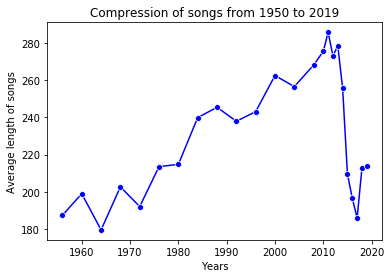

In [20]:
plot_year_values.sort()
plot_year_values

# take 4 years at a time and for year, take the middle year and plot

cycleYear = 4
plot_year_4_years = []
counter = 0
currentYear  = 0
cycleLength = 0
for x in plot_year_values:
    if(x[0] >= 2010):
        cycleYear = 1
        plot_year_4_years.append([x[0], x[1]])
        continue
    elif (x[0]<=1953):
        continue
    year = x[0]
    length = x[1]
    if(counter==(cycleYear/2)):
        currentYear = year  
    cycleLength+=length
    
    counter+=1
    if(counter%(cycleYear)==0):
        plot_year_4_years.append([currentYear, cycleLength/cycleYear])
        cycleLength = 0
        counter = 0
        
sns.lineplot(column(plot_year_4_years,0) , column(plot_year_4_years,1), marker = "o", color = "blue")
plt2.xlabel("Years")
plt2.ylabel("Average length of songs")
plt2.title("Compression of songs from 1950 to 2019")
# plt.xticks()
plt2.show()